# AI tuner feasibility test - Chinese version

The purpose of this test is to show that there is correlation between modifiable argument in Vocaloid and quality of tuning.


## Prepare dataset
In this part we will get a formated vsqx data in dictionary with 2 dimension infromation note and id.

1. import vocaloid project (.vsqx) and extract all test related arguments (arg)
2. format all args to 960 length list where 960 is the time stamps

In [1]:
# adding path to system
import sys, os
sys.path.append(os.getcwd())

# read the data index json file
import json
dataPath = os.path.join(os.getcwd(), 'VocaloidVSQXCollection')
with open(os.path.join(dataPath,"source.json"), 'r') as f:
    source = json.load(f) # source is a dictionary
fileList = [source[sourceIndex]["file"] for sourceIndex in range(len(source))]

# initialise all reoslvers
from vocaloidDao import vocaloidVSQXResolver
resolverList = [vocaloidVSQXResolver(os.path.join(dataPath, fileName)) for fileName in fileList]

In [2]:
# resolve all original data in parallel way, and save them to loacl
from vocaloidDao import parallelResolve
parallelResolve(resolverList)


local computer has: 16 cores

Parallal computing takes 0.00 seconds to finish.



In [3]:
# load saved data
VocaloidDataDfs = [resolver.loadFormatedVocaloidData() for resolver in resolverList]

# import as dataframe
import pandas as pd 
VocaloidDataDf = pd.DataFrame()
for VocaloidDataDfIndex in range(len(VocaloidDataDfs)):
    VocaloidDataDf = VocaloidDataDf.append(VocaloidDataDfs[VocaloidDataDfIndex])
VocaloidDataDf = VocaloidDataDf.reset_index()
VocaloidDataDf.head()

Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 
Log: loaded 


index                                                  D  \
0      0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      2  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   
3      3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4      4  [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 5...   

                                                   G  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   W  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   P  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [2418, 2418, 2418, 2418, 2418, 2418, 2418, 241...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   S  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 VEL  \
0  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   
1  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   
2  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   
3  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   
4  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...   

                                                   T  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                 OPE  \
0  [127, 127, 127, 127, 127, 127, 127, 127, 127, ...   
1  [127, 127, 127, 127, 127, 127, 127, 127, 127, ...   
2  [127, 127, 127, 127, 127, 127, 127, 127, 127, ...   
3  [127, 127, 127, 127, 127, 127, 127, 127, 127, ...   
4  [127, 127, 127, 127, 127, 127, 127, 127, 127, ...   

                                                 DUR  
0  [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...  
1  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...  
2  [150, 150, 150, 150, 150, 150, 150, 150, 150, ...  
3  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...  
4  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...

In [4]:
2248*9*960

19422720

## Formating data before evaluation

The above dataframe is scary, with 19 million data as 3 dimension. We have to reduce the data by extract the main features of each 960 vector, and join to a dataframe. So, the next challenge we face is how to extract this features.

We decide to take following data:

> 1. Continuous: VEL OPE DUR
> 2. Discrete: D G W P S
>   - fearure without 0s: 
>       + mid, mean, sd, mod
>       + ZCR (zero-crossing rate)
>       + ZCR (zero-crossing rate)
>       + ZCR (zero-crossing rate)
>       + ZCR (zero-crossing rate)
> 3. `Continuous` means one note one value, `Discrete` means one time stamp one value

See more: https://www.cnblogs.com/xingshansi/p/6815217.html


In [5]:
def zcr(dataArray):
    pass


In [6]:
# get discrete args fearure
discreteArgsDf = VocaloidDataDf[["VEL","OPE","DUR"]].applymap(lambda x : x[0])
discreteArgsDf.columns = discreteArgsDf.columns.map(lambda x : x+("-SINGLE"))
discreteArgsDf.head()

VEL-SINGLE  OPE-SINGLE  DUR-SINGLE
0          64         127          90
1          64         127          30
2          64         127         150
3          64         127          30
4          64         127          30

In [7]:
# get continuous args feature
import numpy as np

## mean
continuousArgsDf = pd.DataFrame()
continuousArgsDf = VocaloidDataDf[["D","G","W","P","S"]].applymap(lambda x : np.mean([i for i in x if i!=0]+[0]))
continuousArgsDf.columns = continuousArgsDf.columns.map(lambda x : x+("-MEAN"))

# without 0s
from scipy import stats
## list all function we need 
aspectDict = {"-MID": np.median, "-SD": np.std, "-MOD": lambda x : stats.mode(x)[0][0]}

## prepare a mapping function
def appendAspect(dict, continuousArgsDf):
    for key in dict.keys():
        continuousArgsDfTemp = VocaloidDataDf[["D","G","W","P","S"]].applymap(lambda x : dict[key]([i for i in x if i!=0]+[0]))
        continuousArgsDfTemp.columns = continuousArgsDfTemp.columns.map(lambda x : x+(key))
        continuousArgsDf = continuousArgsDf.join(continuousArgsDfTemp,on=continuousArgsDf.index)
    return continuousArgsDf
## apply mapping function to our data set
continuousArgsDf = appendAspect(aspectDict,continuousArgsDf)

continuousArgsDf.head()

D-MEAN  G-MEAN  W-MEAN       P-MEAN  S-MEAN  D-MID  G-MID  W-MID  \
0   0.000000     0.0     0.0     0.000000     0.0    0.0    0.0    0.0   
1   0.000000     0.0     0.0     0.000000     0.0    0.0    0.0    0.0   
2  63.576159     0.0     0.0  2401.986755     0.0   64.0    0.0    0.0   
3   0.000000     0.0     0.0     0.000000     0.0    0.0    0.0    0.0   
4  53.225806     0.0     0.0     0.000000     0.0   55.0    0.0    0.0   

    P-MID  S-MID      D-SD  G-SD  W-SD        P-SD  S-SD  D-MOD  G-MOD  W-MOD  \
0     0.0    0.0  0.000000   0.0   0.0    0.000000   0.0      0      0      0   
1     0.0    0.0  0.000000   0.0   0.0    0.000000   0.0      0      0      0   
2  2418.0    0.0  5.190972   0.0   0.0  196.121397   0.0     64      0      0   
3     0.0    0.0  0.000000   0.0   0.0    0.000000   0.0      0      0      0   
4     0.0    0.0  9.717658   0.0   0.0    0.000000   0.0     55      0      0   

   P-MOD  S-MOD  
0      0      0  
1      0      0  
2   2418      0  
3      0      0  
4      0      0

In [8]:
# join both discrete and continuous args dataframe
argsDf = pd.DataFrame.join(discreteArgsDf, continuousArgsDf, on=discreteArgsDf.index)

argsDf.head()

VEL-SINGLE  OPE-SINGLE  DUR-SINGLE     D-MEAN  G-MEAN  W-MEAN       P-MEAN  \
0          64         127          90   0.000000     0.0     0.0     0.000000   
1          64         127          30   0.000000     0.0     0.0     0.000000   
2          64         127         150  63.576159     0.0     0.0  2401.986755   
3          64         127          30   0.000000     0.0     0.0     0.000000   
4          64         127          30  53.225806     0.0     0.0     0.000000   

   S-MEAN  D-MID  G-MID  ...      D-SD  G-SD  W-SD        P-SD  S-SD  D-MOD  \
0     0.0    0.0    0.0  ...  0.000000   0.0   0.0    0.000000   0.0      0   
1     0.0    0.0    0.0  ...  0.000000   0.0   0.0    0.000000   0.0      0   
2     0.0   64.0    0.0  ...  5.190972   0.0   0.0  196.121397   0.0     64   
3     0.0    0.0    0.0  ...  0.000000   0.0   0.0    0.000000   0.0      0   
4     0.0   55.0    0.0  ...  9.717658   0.0   0.0    0.000000   0.0     55   

   G-MOD  W-MOD  P-MOD  S-MOD  
0      0      0      0      0  
1      0      0      0      0  
2      0      0   2418      0  
3      0      0      0      0  
4      0      0      0      0  

[5 rows x 23 columns]

In [9]:
# get the rank list from our data list file (we has already import as json)
rankList = []
for resolverIndex in range(len(resolverList)):
    noteNum = resolverList[resolverIndex].noteNum
    rank = source[resolverIndex]["rank"]
    for i in range(noteNum):
        rankList+=[rank]
## format to data frame
rankDf = pd.DataFrame({"RANK":rankList})

rankDf.head()

RANK
0     6
1     6
2     6
3     6
4     6

In [10]:
# join our args rank dataframe together
dataDf = argsDf.join(rankDf, on=rankDf.index)

dataDf.head()

VEL-SINGLE  OPE-SINGLE  DUR-SINGLE     D-MEAN  G-MEAN  W-MEAN       P-MEAN  \
0          64         127          90   0.000000     0.0     0.0     0.000000   
1          64         127          30   0.000000     0.0     0.0     0.000000   
2          64         127         150  63.576159     0.0     0.0  2401.986755   
3          64         127          30   0.000000     0.0     0.0     0.000000   
4          64         127          30  53.225806     0.0     0.0     0.000000   

   S-MEAN  D-MID  G-MID  ...  G-SD  W-SD        P-SD  S-SD  D-MOD  G-MOD  \
0     0.0    0.0    0.0  ...   0.0   0.0    0.000000   0.0      0      0   
1     0.0    0.0    0.0  ...   0.0   0.0    0.000000   0.0      0      0   
2     0.0   64.0    0.0  ...   0.0   0.0  196.121397   0.0     64      0   
3     0.0    0.0    0.0  ...   0.0   0.0    0.000000   0.0      0      0   
4     0.0   55.0    0.0  ...   0.0   0.0    0.000000   0.0     55      0   

   W-MOD  P-MOD  S-MOD  RANK  
0      0      0      0     6  
1      0      0      0     6  
2      0   2418      0     6  
3      0      0      0     6  
4      0      0      0     6  

[5 rows x 24 columns]

## Clean our data

1. delete all data that the dur longer than 960

Notice: any other cleaning process should be done in this step


In [11]:
dataDf = dataDf[dataDf['DUR-SINGLE']<=960].reset_index()
dataDf.head()

index  VEL-SINGLE  OPE-SINGLE  DUR-SINGLE     D-MEAN  G-MEAN  W-MEAN  \
0      0          64         127          90   0.000000     0.0     0.0   
1      1          64         127          30   0.000000     0.0     0.0   
2      2          64         127         150  63.576159     0.0     0.0   
3      3          64         127          30   0.000000     0.0     0.0   
4      4          64         127          30  53.225806     0.0     0.0   

        P-MEAN  S-MEAN  D-MID  ...  G-SD  W-SD        P-SD  S-SD  D-MOD  \
0     0.000000     0.0    0.0  ...   0.0   0.0    0.000000   0.0      0   
1     0.000000     0.0    0.0  ...   0.0   0.0    0.000000   0.0      0   
2  2401.986755     0.0   64.0  ...   0.0   0.0  196.121397   0.0     64   
3     0.000000     0.0    0.0  ...   0.0   0.0    0.000000   0.0      0   
4     0.000000     0.0   55.0  ...   0.0   0.0    0.000000   0.0     55   

   G-MOD  W-MOD  P-MOD  S-MOD  RANK  
0      0      0      0      0     6  
1      0      0      0      0     6  
2      0      0   2418      0     6  
3      0      0      0      0     6  
4      0      0      0      0     6  

[5 rows x 25 columns]

## Observe data
Perform the following steps:

1. normalise our dataset (we choose to use normaliser instead of standardiser, because there is a limit in the score which is about 100, it is more meaningful if we use normaliser)
2. play with data to see if there are some observable trend of data
3. plot the heat map of regression coefficient, and leave one argument from the pair with higher value
4. fit to PCA modle, plot the corresponding percentage variance in a scree plot, combine the first several PCA
5. regress the MSE of sound onto the combined PCA

If the MSE is reasonaly small, we can accept this result.

### Normalisation and Standardization

In [12]:
# define a normaliser
def normalizer(dataArray):
    if dataArray.max() - dataArray.min() == 0:
        return dataArray
    return (dataArray-dataArray.min())/(dataArray.max() - dataArray.min())

# define a standardizer
def standardizer(dataArray):
    if dataArray.max() - dataArray.min() == 0:
        return dataArray
    return (dataArray-dataArray.mean())/dataArray.std()

dataDfNormalized = dataDf.apply(standardizer)

dataDfNormalized.head()

index  VEL-SINGLE  OPE-SINGLE  DUR-SINGLE    D-MEAN    G-MEAN  W-MEAN  \
0 -1.722081   -0.307842    0.164751   -0.845865 -0.296076 -0.161203     0.0   
1 -1.721071   -0.307842    0.164751   -1.192279 -0.296076 -0.161203     0.0   
2 -1.720060   -0.307842    0.164751   -0.499451  3.684234 -0.161203     0.0   
3 -1.719050   -0.307842    0.164751   -1.192279 -0.296076 -0.161203     0.0   
4 -1.718040   -0.307842    0.164751   -1.192279  3.036230 -0.161203     0.0   

     P-MEAN    S-MEAN     D-MID  ...      G-SD  W-SD      P-SD      S-SD  \
0  0.036397 -0.113074 -0.296268  ... -0.128393   0.0 -0.275321 -0.101874   
1  0.036397 -0.113074 -0.296268  ... -0.128393   0.0 -0.275321 -0.101874   
2  1.847120 -0.113074  3.640325  ... -0.128393   0.0  1.097092 -0.101874   
3  0.036397 -0.113074 -0.296268  ... -0.128393   0.0 -0.275321 -0.101874   
4  0.036397 -0.113074  3.086742  ... -0.128393   0.0 -0.275321 -0.101874   

      D-MOD     G-MOD  W-MOD     P-MOD     S-MOD      RANK  
0 -0.296268 -0.160587      0  0.037415 -0.113691 -2.141725  
1 -0.296268 -0.160587      0  0.037415 -0.113691 -2.141725  
2  3.640325 -0.160587      0  1.837418 -0.113691 -2.141725  
3 -0.296268 -0.160587      0  0.037415 -0.113691 -2.141725  
4  3.086742 -0.160587      0  0.037415 -0.113691 -2.141725  

[5 rows x 25 columns]

### Starting observe data

In [13]:
# prepare for evaluation tool
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.spatial import Voronoi, voronoi_plot_2d

def noiser(df):
    return df.applymap(lambda x : x+np.random.random()*0.001)

def distributionPlot(columnName0, columnName1, hueColumn, dataDfNormalized):
    # getting data
    dataPoints = dataDfNormalized[[columnName0, columnName1]]

    # adding noise
    dataPointsWithNoise = noiser(dataDfNormalized)

    # plot the overview of the data
    fig, ax = plt.subplots(1, sharey=True)
    sns.scatterplot(x = columnName0 ,y = columnName1, data = dataPointsWithNoise, hue=hueColumn, marker = "o", ax=ax)
    plt.xlim([-0.2,1.2]), plt.ylim([-0.2,1.2])

    """
    https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram/20678647#20678647
    https://ipython-books.github.io/145-computing-the-voronoi-diagram-of-a-set-of-points/
    """
    # add 4 distant dummy points to fix coloring problem
    dataPoints = np.append((dataDfNormalized)[['P-MEAN', 'RANK']], [[2,2], [-2,2], [2,-2], [-2,-2]], axis = 0)

    # plot Voronoi diagrame
    ## since it the function in scipy return a figure rather an ax, 
    ## we can not plot both figure in the same figure by normal way, 
    ## this can be improved later 
    vor = Voronoi(dataPoints)
    voronoi_plot_2d(vor, show_vertices = True, point_size = 0.5)

    # color list
    colorList = []
    for regionIndex in range(len(vor.regions)):
        if not -1 in vor.regions[regionIndex]:
            polygon = [vor.vertices[i] for i in vor.regions[regionIndex]]
            if len(polygon) == 0:
                colorList += colorList[-1:]
                continue
            colorList += [np.array(polygon).transpose().min()]
        colorList += colorList[-1:]
    colorList = normalizer(np.array(colorList))

    # colorize by the distance from 0 point
    for regionIndex in range(len(vor.regions)):
        if not -1 in vor.regions[regionIndex]:
            polygon = [vor.vertices[i] for i in vor.regions[regionIndex]]
            plt.fill(*zip(*polygon),color=np.repeat(colorList[regionIndex],3))

    # fix the range of axes
    plt.xlim([-0.2,1.2]), plt.ylim([-0.2,1.2])

    plt.show()

def comparisionPlot(columnName0, columnName1, dataDfNormalized):
    # Plotting
    fig = plt.figure(figsize=(12,10))

    gs1 = gridspec.GridSpec(nrows=2, ncols=2)
    ax1 = fig.add_subplot(gs1[:, 0])
    ax2 = fig.add_subplot(gs1[0, 1])
    ax3 = fig.add_subplot(gs1[1, 1])

    dataPointsWithNoise = noiser(dataDfNormalized)
    sns.scatterplot(x = columnName0 ,y = columnName1, data = dataPointsWithNoise, hue="RANK", marker = "o", ax = ax1)

    # noise half version high
    dataPointsWithNoise = noiser(dataDfNormalized[dataDfNormalized["RANK"]<0])
    sns.scatterplot(x = columnName0 ,y = columnName1, data = dataPointsWithNoise, hue="RANK", marker = "o", ax = ax2)

    # noise half version low
    dataPointsWithNoise = noiser(dataDfNormalized[dataDfNormalized["RANK"]>0])
    sns.scatterplot(x = columnName0 ,y = columnName1, data = dataPointsWithNoise, hue="RANK", marker = "o", ax = ax3)

    # ax1.set_xlim([0,1.01]), ax1.set_ylim([0,1.01])
    # ax2.set_xlim([0,1.01]), ax2.set_ylim([0,1.01])
    # ax3.set_xlim([0,1.01]), ax3.set_ylim([0,1.01])

    ax1.set_title("Plot of " +columnName0+ " v.s. " +columnName1)
    ax2.set_title("Seperate Plot of Higher Rank Notes")
    ax3.set_title("Seperate Plot of Lower Rank Notes")

    plt.show()

In [14]:
print(len(dataDfNormalized.columns))
dataDfNormalized.columns

25


Index(['index', 'VEL-SINGLE', 'OPE-SINGLE', 'DUR-SINGLE', 'D-MEAN', 'G-MEAN',
       'W-MEAN', 'P-MEAN', 'S-MEAN', 'D-MID', 'G-MID', 'W-MID', 'P-MID',
       'S-MID', 'D-SD', 'G-SD', 'W-SD', 'P-SD', 'S-SD', 'D-MOD', 'G-MOD',
       'W-MOD', 'P-MOD', 'S-MOD', 'RANK'],
      dtype='object')

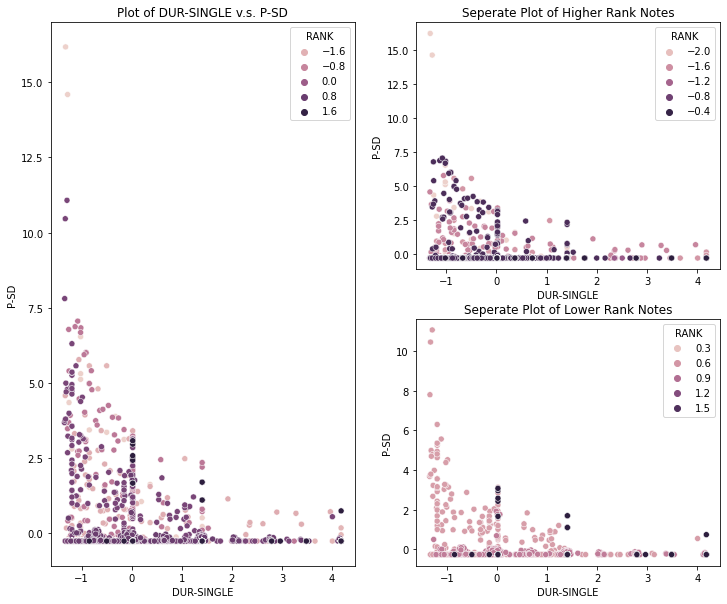

In [15]:
# distributionPlot('DUR-SINGLE','P-SD',"RANK",dataDfNormalized)
comparisionPlot('DUR-SINGLE','P-SD',dataDfNormalized)

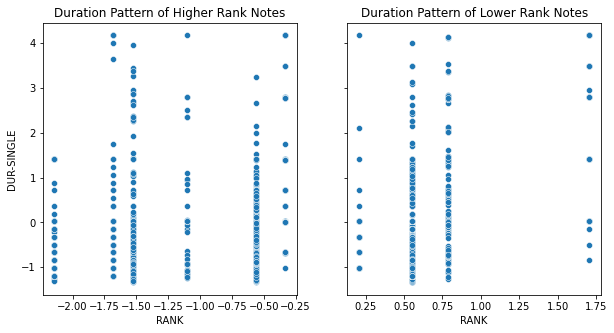

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))

sns.scatterplot(y="DUR-SINGLE",x="RANK", data=dataDfNormalized[dataDfNormalized["RANK"]<0], ax=ax1)
sns.scatterplot(y="DUR-SINGLE",x="RANK", data=dataDfNormalized[dataDfNormalized["RANK"]>0], ax=ax2)
ax1.set_title("Duration Pattern of Higher Rank Notes")
ax2.set_title("Duration Pattern of Lower Rank Notes")
plt.show()

#### Observation 1

- The better the performance of a note in competition, the wider the pitch distributed and this trend can be seen along all duration value.
  + A better tuner is more likly to change the pitch.
- In the Seperate Plot of Higher Rank Notes, there is a pattern of the DUR-SINGLE, values are increase by same amount while duration increase. While in the Seperate Plot of Lower Rank Notes the duration is more like randomly distributed. See second figure.
  + There is some underlaying rule followed by better tuner while set the duration of the notes of song.


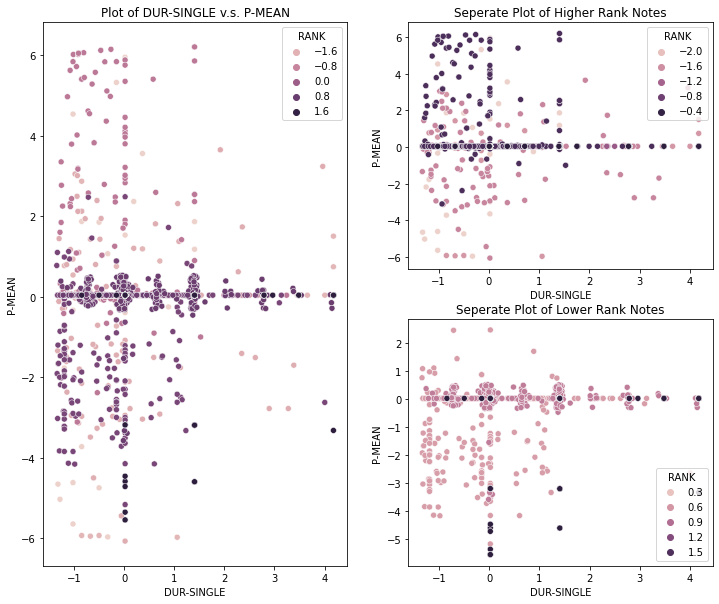

In [17]:
# distributionPlot('DUR-SINGLE','P-MEAN+0s',"RANK",dataDfNormalized)
comparisionPlot('DUR-SINGLE','P-MEAN',dataDfNormalized)

#### Observation 2

- 

### PCA

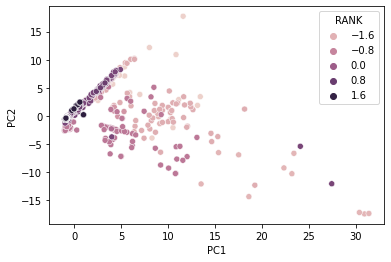

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=(len(dataDfNormalized.columns)-1))
pca.fit(dataDfNormalized[dataDfNormalized.columns[:-1]].values)
pca_result = pca.transform(dataDfNormalized[dataDfNormalized.columns[:-1]].values)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=dataDfNormalized["RANK"])
plt.xlabel("PC1"), plt.ylabel("PC2")
plt.show()

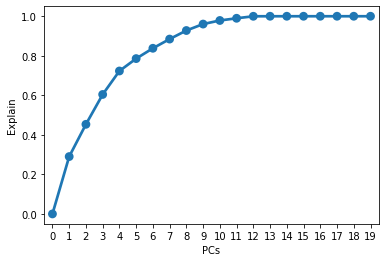

In [19]:
sns.pointplot(y = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(20)], x = [i for i in range(20)])
plt.xlabel("PCs"), plt.ylabel("Explain")
plt.show()

### linear regression

In [30]:
import statsmodels.formula.api as smf

pcs = dataDfNormalized[["RANK"]].join(pd.DataFrame({"PC1":pca_result[:,0]}),on=dataDfNormalized.index)

for i in range(1,9): # we take first 8 value
    pcs = pcs.join(pd.DataFrame({"PC"+str(i+1):pca_result[:,i]}),on=dataDfNormalized.index)

model = smf.ols('RANK ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9', data=pcs)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RANK   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     4799.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:31:59   Log-Likelihood:                -342.94
No. Observations:                3354   AIC:                             705.9
Df Residuals:                    3344   BIC:                             767.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.365e-15      0.005   2.95e-13      1.000      -0.009       0.009
PC1           -0.1299      0.002    -67.510      0.000      -0.134      -0.126
PC2           -0.0639      0.003    -24.921      0.000      -0.069      -0.059
PC3            0.1285      0.003     48.160      0.000       0.123       0.134
PC4           -0.0244      0.003     -8.126      0.000      -0.030      -0.019
PC5           -0.4150      0.004   -100.258      0.000      -0.423      -0.407
PC6           -0.3057      0.005    -67.410      0.000      -0.315      -0.297
PC7            0.2413      0.005     50.229      0.000       0.232       0.251
PC8            0.4103      0.005     82.330      0.000       0.401       0.420
PC9            0.6214      0.006    108.316      0.000       0.610       0.633
==============================================================================
Omnibus:                       15.214   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.247
Skew:                          -0.065   Prob(JB):                      0.00219
Kurtosis:                       2.734   Cond. No.                         2.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

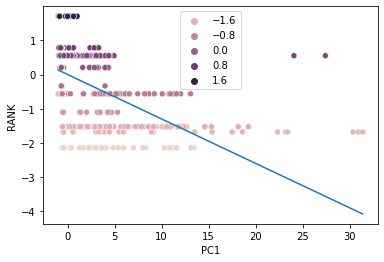

In [21]:
from sklearn.linear_model import LinearRegression

pc = "PC1"

x = np.array(pcs[pc]).reshape((-1,1))
y = dataDfNormalized["RANK"]

model = LinearRegression()
model = model.fit(x, y)

sns.scatterplot(x=pcs[pc], y=dataDfNormalized["RANK"], hue=dataDfNormalized["RANK"])

rank_predict = model.predict(x)
sns.lineplot(x=pcs[pc], y=rank_predict)

plt.show()


## Conclusion

Conclusion and preparation for later step.

1. report on the result
2. automate all processes in data preparation, PCA and regression.